# Kaggle 신용카드 사기 검출(Google Drive Mount)

- creditcard.csv(284,807*31)
- Class : 0(정상), 1(사기)
- 사기 검출(Fraud Detection), 이상탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Aug  4 07:16 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# 1. Data Preprocessing

In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip
!ls -l

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          
total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Aug  5 01:35 drive
drwxr-xr-x 1 root root      4096 Jul 16 13:20 sample_data


In [5]:
# 2. 데이터 읽어오기

In [6]:
import pandas as pd

df =  pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [39]:
print('#정상(0) 사기(1) 갯수:',df.Class.value_counts())
print('# 정상(0) 사기(1) 비율 : ',(df.Class.value_counts()/df.shape[0]) * 100)

#정상(0) 사기(1) 갯수: 0    284315
1       492
Name: Class, dtype: int64
# 정상(0) 사기(1) 비율 :  0    99.827251
1     0.172749
Name: Class, dtype: float64


In [11]:
df.drop('Time', axis=1,inplace=True)

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

((284807, 29), (284807,))

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3, random_state=2045, stratify=y)

In [16]:
# Train_data와 Test_data의 부정 비율 균형
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# Keras Modeling

In [17]:
import tensorflow
tensorflow.__version__

'2.5.0'

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

ccfd = models.Sequential()
ccfd.add(layers.Dense(128, activation = 'relu', input_shape=(29,)))
ccfd.add(layers.Dense(64, activation = 'relu'))
ccfd.add(layers.Dense(32, activation = 'relu'))
ccfd.add(layers.Dense(1, activation = 'sigmoid'))

In [20]:
ccfd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               3840      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


# ModelCompile

In [21]:
ccfd.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['Recall'])


# Model Fit

In [22]:
%time

hist_ccfd = ccfd.fit(X_train,y_train,
                     epochs = 50,
                     batch_size = 1024,
                     validation_data = (X_test,y_test))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Epoch 1/50
195/195 [==============================] - 3s 9ms/step - loss: 0.3147 - recall: 0.2820 - val_loss: 0.0046 - val_recall: 0.7973
Epoch 2/50
195/195 [==============================] - 1s 7ms/step - loss: 0.0180 - recall: 0.6715 - val_loss: 0.0057 - val_recall: 0.8378
Epoch 3/50
195/195 [==============================] - 2s 8ms/step - loss: 0.0044 - recall: 0.7587 - val_loss: 0.0035 - val_recall: 0.8446
Epoch 4/50
195/195 [==============================] - 1s 7ms/step - loss: 0.0050 - recall: 0.7762 - val_loss: 0.0031 - val_recall: 0.8514
Epoch 5/50
195/195 [==============================] - 1s 8ms/step - loss: 0.0041 - recall: 0.7558 - val_loss: 0.0030 - val_recall: 0.8446
Epoch 6/50
195/195 [==============================] - 2s 8ms/step - loss: 0.0039 - recall: 0.7674 - val_loss: 0.0038 - val_recall: 0.8378
Epoch 7/50
195/195 [==============================] - 1s 7ms/step - loss: 0.0036 - recall: 0.7791 - val_loss

# 학습 결과 시각화

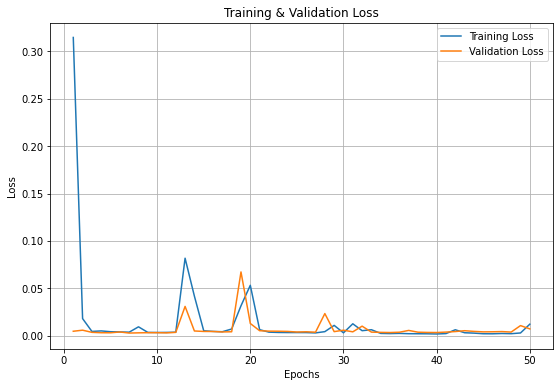

In [27]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_ccfd.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_ccfd.history['loss'])
plt.plot(epochs, hist_ccfd.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# Recall Visualization

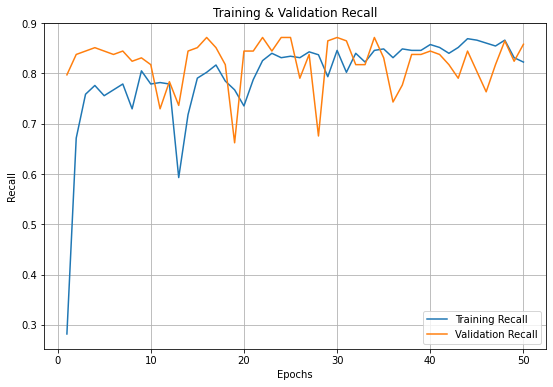

In [29]:
import matplotlib.pyplot as plt
epochs = range(1,len(hist_ccfd.history['recall'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, hist_ccfd.history['recall'])
plt.plot(epochs, hist_ccfd.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

# Model Evaluation

In [30]:
loss,recall = ccfd.evaluate(X_test,y_test)
print('Loss :{:.4f}'.format(loss))
print('recall :{:.4f}'.format(recall))

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0071 - recall: 0.8581
Loss :0.0071
recall :0.8581


# Model predict

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
y_hat = ccfd.predict_classes(X_test)

confusion_matrix(y_test, y_hat)

array([[85273,    22],
       [   21,   127]])

In [35]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 1))
print(recall_score(y_test, y_hat, pos_label = 1))

0.9994967405170698
0.8523489932885906
0.8581081081081081
